# Exploratory Data Analysis

### Resources
1. Read [chapter 4 of this book](http://www.stat.cmu.edu/~hseltman/309/Book/) by Howard Seltman
1. [Udacity class on EDA in R](https://classroom.udacity.com/courses/ud651)
1. [Stanford Visualization Class](http://web.stanford.edu/class/cs448b/cgi-bin/wiki-fa16/index.php?title=Main_Page)
1. [Kaggle Winner Interviews](http://blog.kaggle.com/category/winners-interviews/)

# This notebook
In this notebook, the journey begins once the data is in your hands. It may or may not have been processed before but now its yours and you have to make sense of it.

# Developing a Data Analysis Routine
Do you have a plan when the data gets in your hands or do you just randomly explore data until you reach a conclusions? A data analysis routine is like a **pre-flight checklist**. The notebook **EDA Checklist** lists many ideas that can be used as a template for developing your own routine.

### Interview your data - make a documentary
By the end of the interview you should have enough material to produce a 'documentary' describing what the story is with your data. Exploratory data analysis consists of all the work done before any formal or rigorous statistical analysis. It is an approach you take to better understand your data.

### History of EDA
[EDA][1] was coined by a famous statistician John Tukey in the 1970's to summarize an approach for characterizing data supplemented heavily by visualizations. Tukey is known for [some famous stats quotes](http://www.azquotes.com/author/14847-John_Tukey).

> "When communicating results to non-technical types there is nothing better than a clear visualization to make your point." - John Tukey

### Visualization is the primary tool of EDA
The primary investigative results that your EDA should produce are visualizations. 

### Descriptive statistics are a close second
Along with visualizations come descriptive statistics. 

### No formal hypothesis testing 

[1]: https://en.wikipedia.org/wiki/Exploratory_data_analysis

# EDA with Diamonds
A popular datasets for beginning exploration is diamond data from the [diamond search engine](http://www.diamondse.info/). Check the scrape notebook to see how the data was fetched.

## Subject Matter Research
Subject matter research is important to do before looking at the data. At the bottom of the page exists links to get educated on the datasets.

## Problem Formalization Yes/No/Does it matter?
It isn't necessary to have a formalized problem definition when beginning your data exploration. Of course, there are many times when you will be given a formal task to undertake but regardless EDA can always be performed and sometimes its easier to be unbiased when you don't have a formal problem.

## Messy journals to formal report
Jupyter Notebooks can get very messy. Make a new one when you are ready to write a final report.

# Beginning to peek into the data
One of the first things you will want to do is find the data dictionary if it exists.  

## The Data Dictionary

If there is no data dictionary, you need to create it as you complete your EDA. Even if a data dictionary exists you need to modify it and continually add notes to it. A spreadsheet is a good choice of a file for a data dictionary. You can have columns for:g
* Column Name
* Data Type
* Range of values
* Notes

Let's look at the data dictionary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_colwidth = 100
diamonds_dictionary = pd.read_csv('data/diamonds_dictionary.csv', index_col='Column Name')
diamonds_dictionary

,Description
Column Name,
carat,weight of the diamond
clarity,"measurement of how clear the diamond is (I2 (worst), I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF, FL ..."
color,"diamond color, from L (worst) to D (best)"
cut,"quality of the cut (Fair, Good, V.Good, Premium, Ideal)"
depth,total depth percentage = 2 * z / (x + y)
price,price in US dollars
table,width of top of diamond relative to widest point
x,length in mm
y,width in mm


## Inspect the first few rows
Let's look at the head of the DataFrame and inspect the first few rows.

In [2]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,shape,carat,cut,color,clarity,table,depth,cert,price,x,y,z
0,Round,2.01,Ideal,G,IF,58.0,62.0,GIA,8587270,8.09,8.02,5.00
1,Emerald,20.28,Ideal,D,FL,67.0,60.9,GIA,3046290,17.32,14.50,8.83
2,Emerald,20.28,V.Good,D,FL,67.0,60.9,GIA,2980508,17.32,14.50,8.83
3,Round,20.32,Ideal,F,VVS1,55.0,61.6,GIA,2723138,17.64,17.55,10.83
4,Round,20.25,Ideal,D,VVS1,58.0,60.1,GIA,2693429,17.61,17.72,10.61


# Data Types
One of the most import fundamental attributes of a column is its data type. Check to see if numeric columns appear as object.

In [3]:
diamonds.dtypes

shape       object
carat      float64
cut         object
color       object
clarity     object
table      float64
depth      float64
cert        object
price        int64
x          float64
y          float64
z          float64
dtype: object

## Types of variables: Categorical or Continuous
The two broad classes of variables in a dataset are categorical and continuous. 

* Categorical data is limited to finite, discrete values (can be numeric)
* Continuous variables can take on an infinite set of numerical values (must be numeric)

## Rearranging the column order
You should not accept the default column ordering of your dataset. Even though the diamonds dataset only has 10 columns, we can still rearrange them to make them more meaningful. One simple arrangement is to have the categorical variables come first. 

In [4]:
# old order
diamonds.columns

Index(['shape', 'carat', 'cut', 'color', 'clarity', 'table', 'depth', 'cert',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
new_order = ['cut', 'color', 'clarity', 'carat', 'shape', 
             'cert', 'x', 'y','z','depth', 'table', 'price']
diamonds = diamonds[new_order]
diamonds.head()

,cut,color,clarity,carat,shape,cert,x,y,z,depth,table,price
0,Ideal,G,IF,2.01,Round,GIA,8.09,8.02,5.00,62.0,58.0,8587270
1,Ideal,D,FL,20.28,Emerald,GIA,17.32,14.50,8.83,60.9,67.0,3046290
2,V.Good,D,FL,20.28,Emerald,GIA,17.32,14.50,8.83,60.9,67.0,2980508
3,Ideal,F,VVS1,20.32,Round,GIA,17.64,17.55,10.83,61.6,55.0,2723138
4,Ideal,D,VVS1,20.25,Round,GIA,17.61,17.72,10.61,60.1,58.0,2693429


## A bit more metadata
Let's get the number of observations and the number of missing values for each column.

In [6]:
diamonds.shape

(40000, 12)

### Are there any missing values?


In [7]:
diamonds.isna().sum()

cut        0
color      0
clarity    0
carat      0
shape      0
cert       0
x          0
y          0
z          0
depth      0
table      0
price      0
dtype: int64

# Your Turn #1
Go to the Library Usage EDA Notebook and perform the same steps as we did above.

# Univariate vs Bivariate (and multivariate) Analyses
Univariate analysis is done on one variable at a time. Bivariate or multivariate is analysis done on 2 or more variables.

## Types of variables: Categorical or Continuous
The two broad classes of variables in a dataset are categorical and continuous. 

* Categorical data is limited to finite, discrete values (can be numeric)
* Continuous variables can take on an infinite set of numerical values (must be numeric)

## Graphical vs Non-graphical
Each exploratory analysis will either result in a graph or some numbers representing the data.

# Summarizing
To help guide you on your exploratory data analysis, a suggested plot/table is given in the 10 table cells below.

| Univariate             | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical | Bar char of frequencies (count/percent) | Contingency table (count/percent) |
| Continuous  | Histogram/rugplot/KDE, box/violin/swarm, qqplot, fat tails  | central tendency -mean/median/mode, spread - variance, std, skew, kurt, IQR  |

| Bivariate/multivariate            | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical vs Categorical | heat map, mosaic plot | Two-way Contingency table (count/percent) |
| Continuous vs Continuous  | all pairwise scatterplots, kde, heatmaps |  all pairwise correlation/regression   |
| Categorical vs Continuous  | [bar, violin, swarm, point, strip seaborn plots](http://seaborn.pydata.org/tutorial/categorical.html)  | Summary statistics for each level |

### Beginning with Univariate Analysis
After you have tidied the data and began the data dictionary, a reasonable place to start is with univariate analysis. 

### Treating continuous variables as categorical
Occasionally, it makes sense to treat each unique value of a continuous variable as a level of a categorical variable. The most common situation for this is when there are very few unique values for the continuous variable. 

### Binning continuous variables
It is also possible to bin continuous variables into categories. We are all naturally fond of this when receiving grades: 90 - 100 is mapped to an **A** with 80 - 89 mapped to **B** and so on.

### Get count of unique values for each
The **`nunique`** DataFrame method returns the count of unique values for each column. This can help determine if a continuous variable might be served best as categorical. From the tables below, only the categorical columns have small unique counts.

In [8]:
diamonds.select_dtypes(include='number').nunique()

carat      825
x         1131
y          923
z          648
depth      346
table      104
price    22864
dtype: int64

In [ ]:
diamonds.select_dtypes(exclude='number').nunique()

### Univariate analysis: Interview each column
For smaller datasets, I like to manually examine each variable. This way, I can learn the distribution of each variable, discover potential outliers, missing values and simplify matters by concentrating on only variable at a time.

### Quick with  `describe`
By default, the **`describe`** method gives basic summary statistics on all the numeric variables.

In [9]:
diamonds.describe()

,carat,x,y,z,depth,table,price
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04
mean,2.759422,8.989186,8.185267,5.426613,63.282965,60.187647,4.489490e+04
std,1.484662,1.804817,1.311689,2.856908,6.566226,4.561308,9.148406e+04
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,1.384000e+04
25%,2.010000,7.830000,7.300000,4.710000,61.600000,57.000000,1.741275e+04
50%,2.210000,8.450000,8.020000,5.040000,62.600000,59.000000,2.409500e+04
75%,3.040000,9.740000,8.790000,5.640000,66.200000,62.000000,4.315250e+04
max,26.200000,58.800000,19.170000,69.000000,83.900000,84.000000,8.587270e+06


You can also use it with string columns. A completely different output results:

In [ ]:
diamonds.describe(include='object')

### Univariate analysis on the categorical variables
The frequency of occurrence of each value by raw count and percentage is usually the first (and many times only exploratory step taken) when doing univariate categorical analysis. The **`value_counts`** Series method will be useful here.

In [10]:
diamonds['cut'].value_counts()

Ideal     28987
V.Good     8870
Good       2143
Name: cut, dtype: int64

In [11]:
diamonds['color'].value_counts()

D    6984
F    6723
G    6676
E    6097
H    5242
I    4110
J    2861
K     994
L     313
Name: color, dtype: int64

In [12]:
diamonds['clarity'].value_counts()

VS2     8805
VS1     8419
SI1     7236
VVS2    4959
VVS1    4024
SI2     3379
IF      2631
FL       463
I1        83
I2         1
Name: clarity, dtype: int64

In [13]:
# use normalize=True to get percentage
diamonds['cut'].value_counts(normalize=True).round(2)

Ideal     0.72
V.Good    0.22
Good      0.05
Name: cut, dtype: float64

### Outliers for categorical variables
Categorical columns that have values with very few counts may be considered an outlier. One technique to remove the values is to have a count threshold and change any value that appears less than the threshold to 'other'.

### Changing `object` to `category`
Pandas has a better data type than **`object`** for actual categorical variables properly. It has some strange syntax unfortunately.

Let's convert cut, color, and clarity to category.

In [15]:
from pandas.api.types import CategoricalDtype

cuts = ['Fair', 'Good', 'V.Good', 'Premium', 'Ideal']
cut_category = CategoricalDtype(categories=cuts, ordered=True)
diamonds['cut'] = diamonds['cut'].astype(cut_category)

colors = ['L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
color_category = CategoricalDtype(categories=colors, ordered=True)
diamonds['color'] = diamonds['color'].astype(color_category)

clarity = ['I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
clarity_category = CategoricalDtype(categories=clarity, ordered=True)
diamonds['clarity'] = diamonds['clarity'].astype(clarity_category)

### Sort by category
Notice Pandas sorts by the order we give it

In [16]:
diamonds['color'].value_counts().sort_index()

L     313
K     994
J    2861
I    4110
H    5242
G    6676
F    6723
E    6097
D    6984
Name: color, dtype: int64

In [ ]:
# percentages
diamonds['cut'].value_counts(normalize=True).round(3).sort_index()

## Use Seaborn for bar plots
It sorts categories automatically along the x-axis.

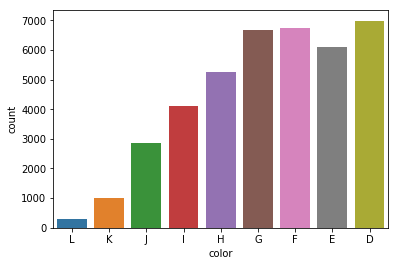

In [17]:
sns.countplot(x='color', data=diamonds)

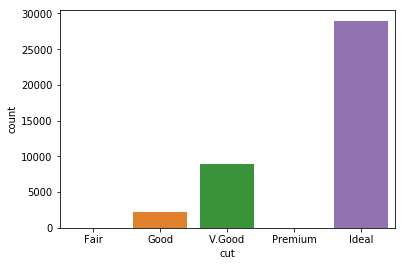

In [18]:
sns.countplot(x='cut', data=diamonds)

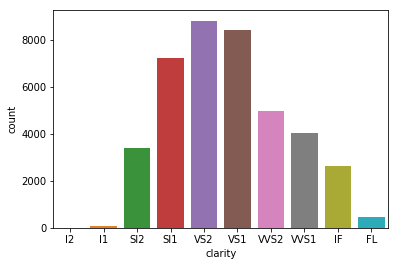

In [19]:
sns.countplot(x='clarity', data=diamonds)

# Your turn #2
Do univariate analysis on the categorical columns. Convert them to the `category` type. If there are unordered categories simply do `astype('category')`

In [ ]:
# code on other notebook

### Feature Engineering Columns of Strings
Categorical columns don't lend themselves to much exploratory data analysis. Features (new variables) may be created from strings. For instance, the first or last letter can be pulled out into its own column for further analysis. The second word of a sentence, the count of the number of vowels and so forth.

Just because a column is a string does not mean a single bar plot of frequencies ends the analysis.

### Univariate analysis on continuous variables
carat is numerical and therefore a much larger array of statistics may be generated to describe the variable. A boxplot is great to see some measure of spread and have some cut-off for outliers, defaulting to 1.5 times the IQR. There appear to be quite a few outliers, seen by the dots beyond the whisker of the plot below.

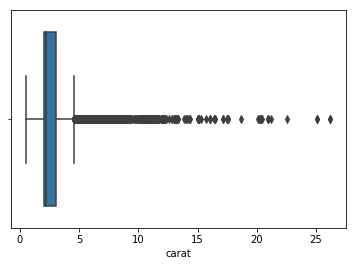

In [20]:
sns.boxplot(x='carat', data=diamonds)

Use a KDE to better see distribution.

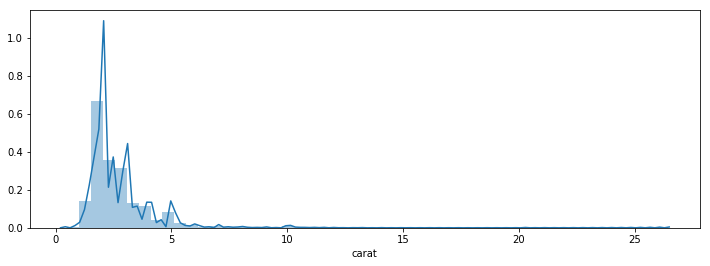

In [21]:
ax = sns.distplot(diamonds['carat'])
ax.figure.set_size_inches((12, 4))

Filter for diamonds less than 5 carats to zoom in on distribution. What could be happening here?

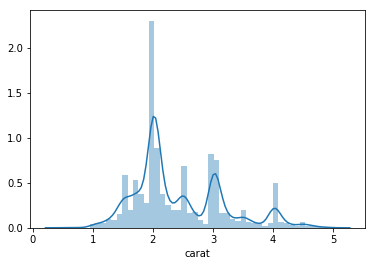

In [22]:
filt = diamonds['carat'] < 5
cs = 'carat'
c5 = diamonds.loc[filt, cs]

ax = sns.distplot(c5)

# Your Turn #3
Complete some univariate analysis on some continuous variables

In [ ]:
# Code over there

## Numerical Outliers (in one dimension)
There is no formal statistical definition of an outlier but generally speaking, we think of outliers as being an abnormal observation distant from other points.

In [23]:
numeric_cols = diamonds.select_dtypes('number').columns
numeric_cols

Index(['carat', 'x', 'y', 'z', 'depth', 'table', 'price'], dtype='object')

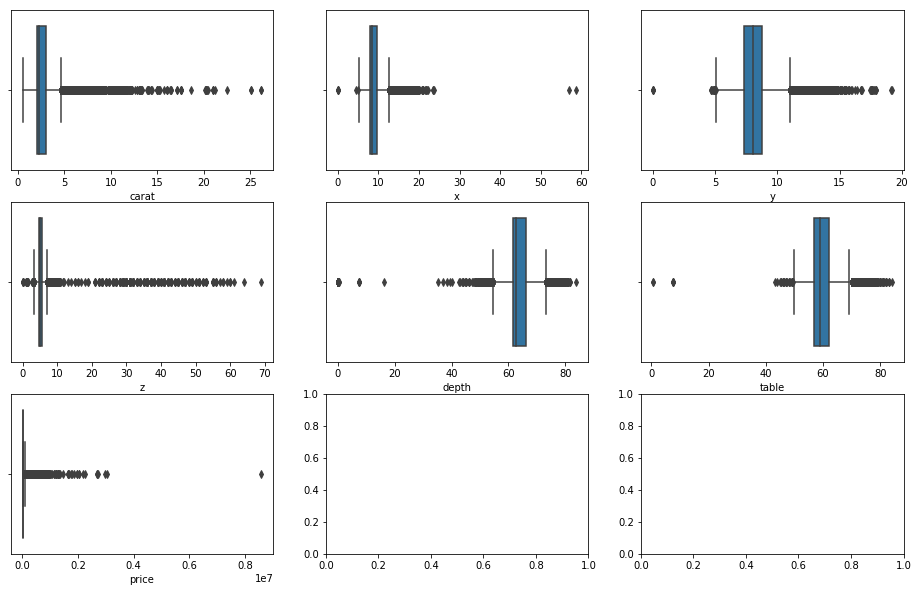

In [24]:
fig, ax_array = plt.subplots(3, 3, figsize=(16, 10), sharex=False, sharey=False)
for ax, col in zip(ax_array.flatten(), numeric_cols):
    sns.boxplot(x=col, data=diamonds, ax=ax)

### Handling outliers
During EDA, we are not necessarily interested in taking an action on the outlier. Labeling it and investigating it further are primary. A decision can be made later to determine if it was an input error or a fairly recorded value. 

The easiest way to handle them is to delete them and make note of them. Applying a transformation (scaling, normalizing, taking log, etc...) is probably the most popular way of accounting for them. It's also possible to attempt to build a model from the rest of the data to predict what that value should have been. Capping the value at some fixed max/min could work as well.

### Categorical Outliers
Those that appear very few (or possibly very many times). Choose a threshold.

In [25]:
vc = diamonds['clarity'].value_counts()
vc

VS2     8805
VS1     8419
SI1     7236
VVS2    4959
VVS1    4024
SI2     3379
IF      2631
FL       463
I1        83
I2         1
Name: clarity, dtype: int64

In [26]:
threshold = 10
filt = vc < threshold
vc[filt]

I2    1
Name: clarity, dtype: int64

In [27]:
low_clarity = vc[filt].index.tolist()
low_clarity

['I2']

In [28]:
filt_clarity = diamonds['clarity'].isin(low_clarity)

In [29]:
outliers = ((diamonds['x'] < 3) | (diamonds['y'] > 30) | (diamonds['z'] > 20) | 
            (diamonds['carat'] > 5) | (diamonds['depth'] < 45) | (diamonds['depth'] > 75) |
            (diamonds['table'] < 40) | (diamonds['table'] > 90) | filt_clarity).astype(int)

In [31]:
diamonds['outliers'] = outliers

### Easy to filter for outliers now

In [32]:
filt = diamonds['outliers'] == 1
diamonds[filt].head()

,cut,color,clarity,carat,shape,cert,x,y,z,depth,table,price,outliers
1,Ideal,D,FL,20.28,Emerald,GIA,17.32,14.50,8.83,60.9,67.0,3046290,1
2,V.Good,D,FL,20.28,Emerald,GIA,17.32,14.50,8.83,60.9,67.0,2980508,1
3,Ideal,F,VVS1,20.32,Round,GIA,17.64,17.55,10.83,61.6,55.0,2723138,1
4,Ideal,D,VVS1,20.25,Round,GIA,17.61,17.72,10.61,60.1,58.0,2693429,1
5,Ideal,D,VVS1,20.25,Round,GIA,17.72,17.61,10.61,60.1,58.0,2679980,1


### Duplicated rows
Let's use the `duplicated` method to find any rows that are exactly duplicated. Let's save them for later examination.

In [33]:
filt = diamonds.duplicated(keep=False)
dupes = diamonds[filt]
dupes.head(10)

,cut,color,clarity,carat,shape,cert,x,y,z,depth,table,price,outliers
416,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
417,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
418,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
419,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
420,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
421,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
422,Ideal,G,VS2,9.05,Radiant,GIA,12.51,12.01,7.55,62.9,75.0,335051,1
559,Ideal,G,SI2,10.29,Cushion,GIA,12.69,12.35,8.32,67.4,73.0,286570,1
560,Ideal,G,SI2,10.29,Cushion,GIA,12.69,12.35,8.32,67.4,73.0,286570,1
561,Ideal,G,SI2,10.29,Cushion,GIA,12.69,12.35,8.32,67.4,73.0,286570,1


# Your Turn #4
Try and discover outliers and duplicated rows.

In [ ]:
# Code over there

# Bivariate and Multivariate EDA
Look way back at [the table summarizing](#Summarizing) the types of graphical and non-graphical tools for the different combinations of variables.

* categorical vs categorical
* categorical vs continuous
* continuous vs continuous

## Categorical vs Categorical
Let's create two-way contingency tables and heat maps to help show the distribution.

In [34]:
col_clar_ct = diamonds.pivot_table(index='clarity', columns='color', aggfunc='size')
col_clar_ct

color,L,K,J,I,H,G,F,E,D
clarity,,,,,,,,,
I2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
I1,1.0,10.0,16.0,10.0,14.0,6.0,9.0,8.0,9.0
SI2,28.0,137.0,413.0,602.0,601.0,573.0,379.0,327.0,319.0
SI1,53.0,202.0,600.0,835.0,912.0,1258.0,1274.0,1114.0,988.0
VS2,89.0,250.0,668.0,897.0,1092.0,1575.0,1549.0,1368.0,1317.0
VS1,66.0,179.0,504.0,801.0,1215.0,1464.0,1453.0,1454.0,1283.0
VVS2,44.0,104.0,363.0,527.0,717.0,793.0,819.0,691.0,901.0
VVS1,20.0,71.0,216.0,301.0,478.0,661.0,794.0,719.0,764.0
IF,12.0,41.0,75.0,120.0,205.0,326.0,418.0,374.0,1060.0


A bit easier to use `crosstab`. Automatically counts.

In [35]:
col_clar_ct = pd.crosstab(diamonds['clarity'], diamonds['color'])
col_clar_ct

color,L,K,J,I,H,G,F,E,D
clarity,,,,,,,,,
I2,0,0,0,0,0,1,0,0,0
I1,1,10,16,10,14,6,9,8,9
SI2,28,137,413,602,601,573,379,327,319
SI1,53,202,600,835,912,1258,1274,1114,988
VS2,89,250,668,897,1092,1575,1549,1368,1317
VS1,66,179,504,801,1215,1464,1453,1454,1283
VVS2,44,104,363,527,717,793,819,691,901
VVS1,20,71,216,301,478,661,794,719,764
IF,12,41,75,120,205,326,418,374,1060


Easier to see areas where data is denser.

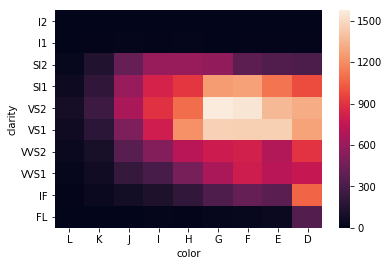

In [36]:
# bulk of the data is in the middle
sns.heatmap(col_clar_ct)

In [37]:
cut_color_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
cut_color_ct

color,L,K,J,I,H,G,F,E,D
cut,,,,,,,,,
Good,25,63,164,184,244,347,378,332,406
V.Good,52,142,637,944,1201,1502,1547,1404,1441
Ideal,236,789,2060,2982,3797,4827,4798,4361,5137


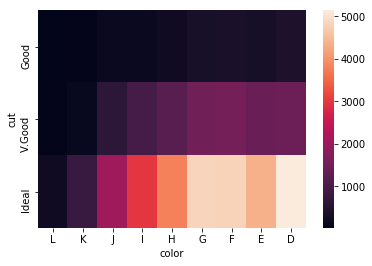

In [38]:
sns.heatmap(cut_color_ct)

## Normalize results
Set `normalize` to "index", "columns", or "all".

In [39]:
cut_color_ct_norm = pd.crosstab(diamonds['cut'], diamonds['color'], normalize='index')
cut_color_ct_norm

color,L,K,J,I,H,G,F,E,D
cut,,,,,,,,,
Good,0.011666,0.029398,0.076528,0.085861,0.113859,0.161923,0.176388,0.154923,0.189454
V.Good,0.005862,0.016009,0.071815,0.106426,0.135400,0.169335,0.174408,0.158286,0.162458
Ideal,0.008142,0.027219,0.071066,0.102874,0.130990,0.166523,0.165522,0.150447,0.177217


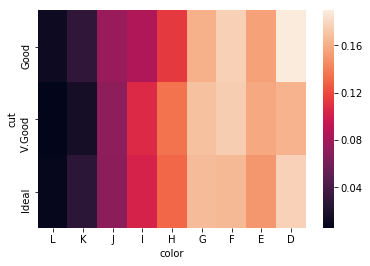

In [40]:
sns.heatmap(cut_color_ct_norm)

# Your Turn #5
Do some analysis on categorical vs categorical data

In [ ]:
# Code over there

## Continuous vs Continuous and Categorical vs Continuous
All the plots in the categorical section in the [seaborn tutorial](http://seaborn.pydata.org/tutorial/categorical.html) will be of major help here. 

### A loose problem statement
The rest of the notebook will work on discovering how price changes with respect to the other variables.

In [41]:
ds = diamonds.sample(frac=.1, random_state=1)

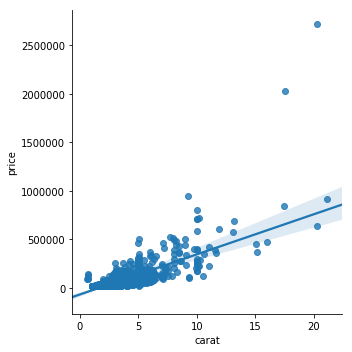

In [42]:
sns.lmplot(x='carat', y='price', data=ds)

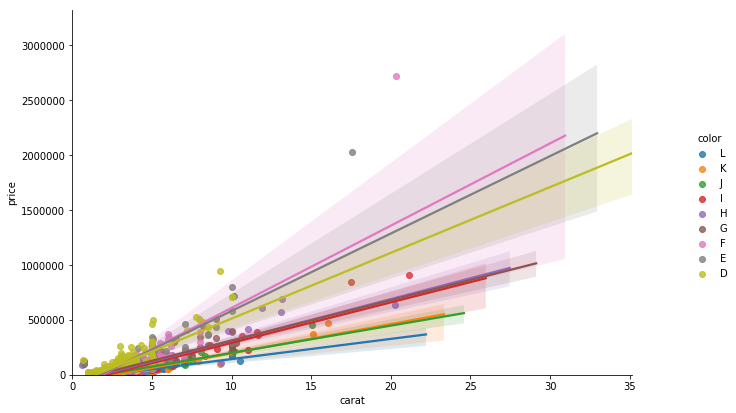

In [43]:
g = sns.lmplot(x='carat', y='price', data=ds, hue='color')
g.set(xbound=0, ybound=0)
g.fig.set_size_inches(12, 6)

In [44]:
ds.clarity.value_counts()

VS1     859
VS2     853
SI1     702
VVS2    507
VVS1    422
SI2     318
IF      287
FL       43
I1        9
I2        0
Name: clarity, dtype: int64

## Make categories of carat
This will help us avoid a scatterplot.

In [45]:
diamonds['carat_cat']= pd.qcut(diamonds['carat'], 10)

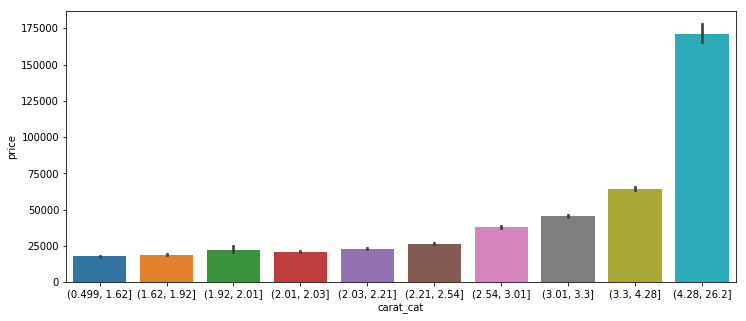

In [46]:
ax = sns.barplot(x='carat_cat', y='price', data=diamonds)
ax.figure.set_size_inches(12, 5)

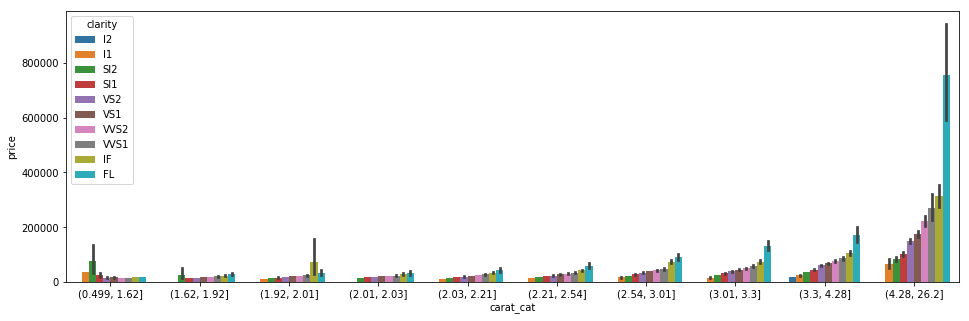

In [47]:
ax = sns.barplot(x='carat_cat', y='price', data=diamonds, hue='clarity')
ax.figure.set_size_inches((16, 5))

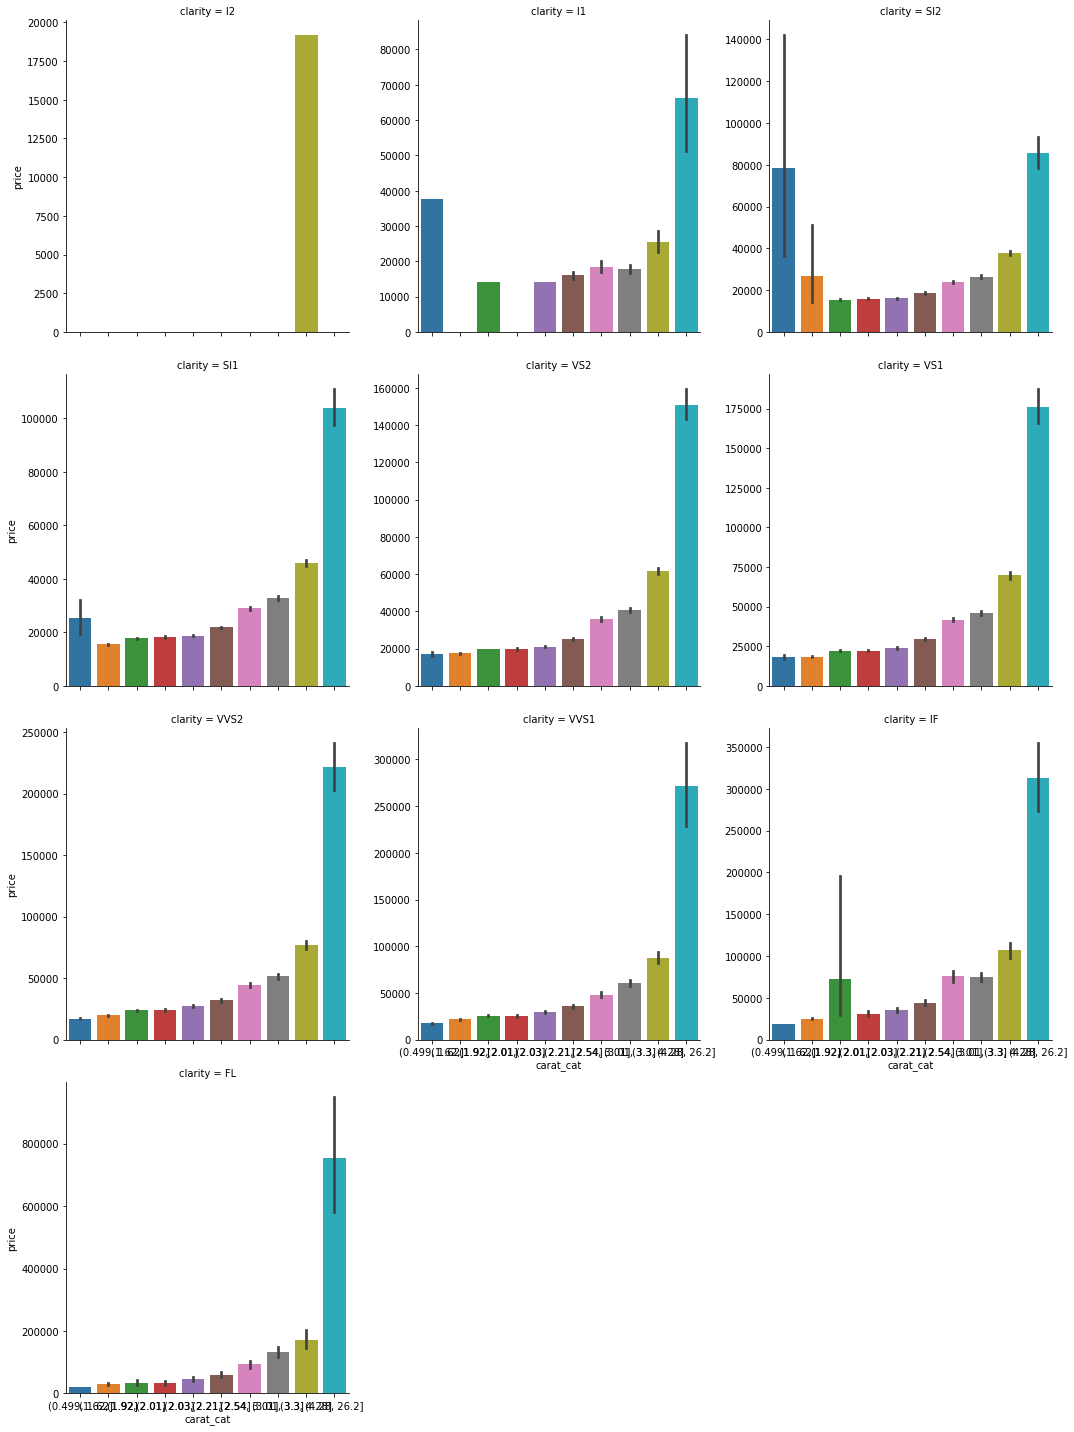

In [48]:
sns.catplot(x='carat_cat', y='price', data=diamonds, col='clarity', kind='bar', col_wrap=3, sharey=False)

# Your Turn #6
Make some plots on categorical vs continuous variables